In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [2]:
def binomial_tree_call(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Stock prices at maturity
    ST = np.array([S0 * u**j * d**(N - j) for j in range(N + 1)])
    C = np.maximum(ST - K, 0)

    # Backward induction
    for i in reversed(range(N)):
        C = np.exp(-r * dt) * (p * C[1:] + (1 - p) * C[:-1])

    return C[0]

In [4]:
def binomial_delta(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    S_u = S0 * u
    S_d = S0 * d

    C_u = binomial_tree_call(S_u, K, T - dt, r, sigma, N - 1)
    C_d = binomial_tree_call(S_d, K, T - dt, r, sigma, N - 1)

    delta = (C_u - C_d) / (S_u - S_d)
    return delta

In [5]:
def binomial_gamma(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    S_up = S0 * u
    S_down = S0 * d

    delta_up = binomial_delta(S_up, K, T - dt, r, sigma, N - 1)
    delta_down = binomial_delta(S_down, K, T - dt, r, sigma, N - 1)

    gamma = (delta_up - delta_down) / ((S_up - S_down) / 2)
    return gamma

In [6]:
def binomial_theta(S0, K, T, r, sigma, N):
    dt = T / N
    price_now = binomial_tree_call(S0, K, T, r, sigma, N)
    price_forward = binomial_tree_call(S0, K, T - dt, r, sigma, N - 1)
    theta = (price_forward - price_now) / dt
    return theta

In [11]:
S_range = np.linspace(50, 150, 1000)
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 100

deltas = [binomial_delta(S, K, T, r, sigma, N) for S in S_range]
gammas = [binomial_gamma(S, K, T, r, sigma, N) for S in S_range]
thetas = [binomial_theta(S, K, T, r, sigma, N) for S in S_range]

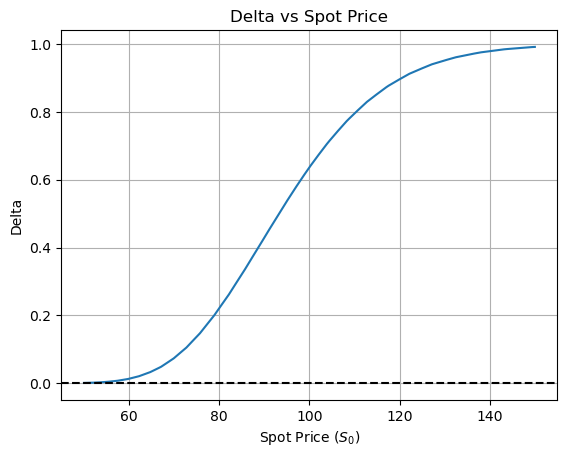

In [15]:
plt.plot(S_range, deltas, label="Delta")
plt.axhline(0, color='k', linestyle='--')
plt.title("Delta vs Spot Price")
plt.xlabel("Spot Price ($S_0$)")
plt.ylabel("Delta")
plt.grid(True)
plt.savefig("binomial_delta.png")
plt.show()

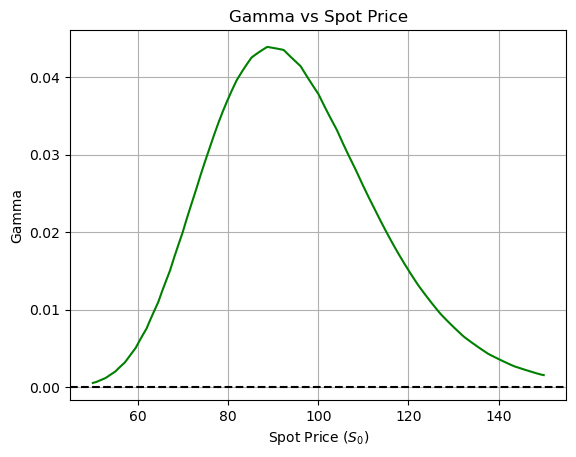

In [16]:
plt.plot(S_range, gammas, label="Gamma", color='green')
plt.axhline(0, color='k', linestyle='--')
plt.title("Gamma vs Spot Price")
plt.xlabel("Spot Price ($S_0$)")
plt.ylabel("Gamma")
plt.grid(True)
plt.savefig("binomial_gamma.png")
plt.show()

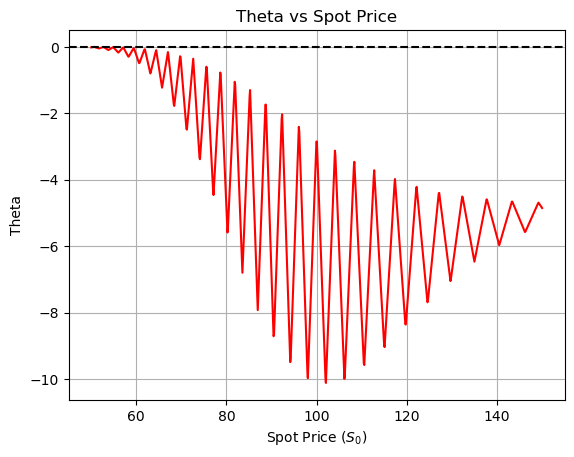

In [17]:
plt.plot(S_range, thetas, label="Theta", color='red')
plt.axhline(0, color='k', linestyle='--')
plt.title("Theta vs Spot Price")
plt.xlabel("Spot Price ($S_0$)")
plt.ylabel("Theta")
plt.grid(True)
plt.savefig("binomial_theta.png")
plt.show()

### Summary

- Delta rises from 0 (OTM) to 1 (ITM) for calls
- Gamma peaks at ATM; indicates rapid delta change
- Theta is mostly negative; steepest near ATM
- Discrete Greeks converge to Black-Scholes Greeks as $$( N \to \infty )$$

This CRR-based Greek analysis allows:
- Discrete-time hedging
- Sensitivity analysis before expiry